<a href="https://colab.research.google.com/github/Antikadas1/Data_Analysis_Projects/blob/main/Hypothesis_Test_Practical_Implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variants of Hypothesis testing

# Process of Hypothesis testing

# lets do some practical implemetation:

# Normality test using Shapiro-Wilk Test : tests If data is normally distributed 
Assumption : Observations are identically distributed

In [ ]:
#Data Import
import pandas as pd
WineData = pd.read_csv("winequality-red.csv")

In [ ]:
len(WineData)

1599

In [ ]:
WineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


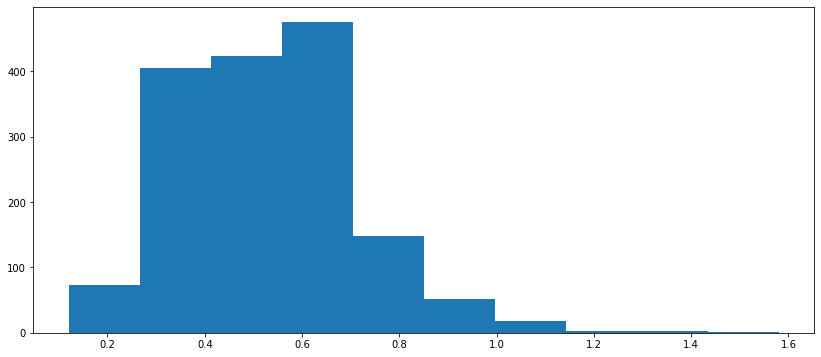

In [ ]:
#Cheking Histogram
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(WineData['volatile acidity'])
pyplot.show()

In [ ]:
#Help from Python
#the smaller the p-value, the stronger the evidence that you should reject the null hypothesis

ho="normaly distributed"

from scipy.stats import shapiro

DataToTest = WineData['volatile acidity']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

alpha=0.05

#if p<0.05/alpha h0 is not 
if p > alpha:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.97, p=0.000000000000000268680677283857
Not a normal distribution


In [ ]:
#Lets genrate normally distributed data from Python
from numpy.random import randn
DataToTest = randn(100)

In [ ]:
DataToTest

array([-1.26835175,  0.39519958, -1.34066502, -0.07486318,  0.49628157,
        0.55320107, -0.13219699,  1.51713582,  1.22791908, -0.54461467,
       -0.98165942,  0.05235275, -0.0420821 , -1.32850809,  2.02985811,
        0.08841611, -0.40327596,  0.10328189, -1.04265866, -0.52618444,
       -0.34065605, -0.3682545 ,  0.84636525, -0.64795336,  0.85422184,
        0.51138591, -0.2505193 ,  0.58065867,  1.36814427, -0.848968  ,
       -1.41730206, -0.07349661, -0.76240099, -0.61145997, -0.39049219,
        1.60048252, -0.08686128,  1.27805609,  0.28706832,  0.13707852,
        1.75805872,  0.36130711,  0.97660949, -0.73873852, -0.29463218,
        0.37949245, -0.17714034,  0.90840786,  0.50410535, -0.13996203,
        0.60077083,  1.47787588, -0.18546041, -0.35638544,  0.25356097,
        1.03398434,  0.66387009, -1.49980933,  1.29807202,  1.46311513,
        0.29274165, -0.79833951, -0.41515497,  0.47696922, -1.61150569,
        0.51229154,  1.47821002, -0.47742382,  0.42627255, -1.31

In [ ]:
stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.98, p=0.200424879789352416992187500000
Normal distribution


# Normality test using K^2 Normality Test Test : tests If data is normally distributed 
Assumption : Observations are identically distributed

In [ ]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = WineData['volatile acidity']

#statisticfloat or array
#s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not Normllay distributed')

stat=143.4193435598, p=0.0000000000
Not Normllay distributed


# Correlation Test - Pearson and Spearman’s Rank Correlation
Asumption - Identical and Normal Distribution

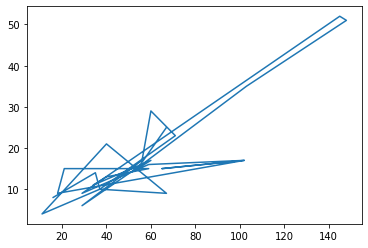

In [ ]:
FirstSample = WineData[1:30]['total sulfur dioxide']
SecondSample = WineData[1:30]['free sulfur dioxide']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [ ]:
ho="our data is not co-related"

In [ ]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)
print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.855, p=0.000000
dependent samples


In [ ]:
WineData[1:30].corr(method="pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.325296,0.553331,0.064789,0.145997,0.369643,0.351803,0.558823,-0.554355,0.176146,-0.014915,0.232732
volatile acidity,-0.325296,1.000000,-0.808892,0.086848,-0.086997,-0.046489,-0.045020,-0.018832,0.176232,-0.058765,-0.116946,-0.323907
citric acid,0.553331,-0.808892,1.000000,0.163451,0.302150,0.273691,0.356156,0.321183,-0.402765,0.404090,0.247358,0.246825
residual sugar,0.064789,0.086848,0.163451,1.000000,-0.069497,0.278564,0.580704,0.524667,-0.011351,0.074962,0.358012,-0.324054
chlorides,0.145997,-0.086997,0.302150,-0.069497,1.000000,0.226563,0.211043,0.118830,-0.601472,0.644596,-0.342212,-0.037891
free sulfur dioxide,0.369643,-0.046489,0.273691,0.278564,0.226563,1.000000,0.854553,0.430067,-0.204240,0.156305,0.056671,0.120759
total sulfur dioxide,0.351803,-0.045020,0.356156,0.580704,0.211043,0.854553,1.000000,0.523186,-0.280118,0.210051,0.229037,-0.112902
density,0.558823,-0.018832,0.321183,0.524667,0.118830,0.430067,0.523186,1.000000,-0.181546,0.300643,-0.089917,-0.249689
pH,-0.554355,0.176232,-0.402765,-0.011351,-0.601472,-0.204240,-0.280118,-0.181546,1.000000,-0.539957,0.232744,0.007259
sulphates,0.176146,-0.058765,0.404090,0.074962,0.644596,0.156305,0.210051,0.300643,-0.539957,1.000000,-0.172364,-0.120335


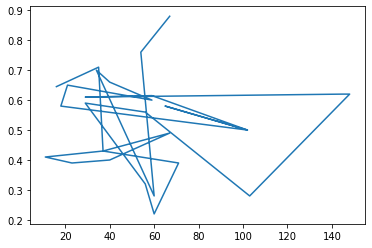

In [ ]:
FirstSample = WineData[1:30]['total sulfur dioxide']
SecondSample = WineData[1:30]['volatile acidity']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [ ]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=-0.045, p=0.816623
independent samples


# Correlation of categorical variable - Chi square test

In [ ]:
#Tests whether two categorical variables are related or independent.
#Assumptions - independent observation, size in each box of contingency table > 25
# Example of the Chi-Squared Test


In [ ]:
TitanicData = pd.read_csv("train.csv")

In [ ]:
TitanicData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
contingency_data = pd.crosstab(TitanicData['Pclass'], TitanicData['Sex'],margins = False)

In [ ]:
contingency_data

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('dependent categories')
else:
    print('independent categories')

stat=16.971, p=0.000
dependent categories


In [ ]:
contingency_data = [[25,125],[1200,240]] #Observe the numbers carefully

In [ ]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=337.622, p=0.000
dependent categories


# Parametic test 1- T-test

# Definiton of Parametric test - Main assumption - data is normally distributed

In [ ]:
#Scores of me and Virat
my_score = [23,21,31,20,19,35,26,22,21,19]
virat_score = [46,42,62,40,38,70,52,44,42,38]

In [ ]:
#Lets check mean of our scores
import numpy as np
print('Aman mean score:', np.mean(my_score))
print('Virat mean score:', np.mean(virat_score))

Aman mean score: 23.7
Virat mean score: 47.4


In [ ]:
#One Sample T-test
import scipy
import scipy.stats
scipy.stats.ttest_1samp(my_score,23.7)

#NULL THERE IS NO DIFFERENCE
# p>0.05/5% 
#accept null

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [ ]:
#Independent Sample T-test
scipy.stats.ttest_ind(my_score,virat_score)



Ttest_indResult(statistic=-6.210850679090182, pvalue=7.3390410384768156e-06)

In [ ]:
my_score_second_Tour = [46,42,62,40,38,70,52,44,42,38]

In [ ]:
#Apired sample t-test
scipy.stats.ttest_rel(my_score,my_score_second_Tour)

Ttest_relResult(statistic=-13.88788431654638, pvalue=2.1983272300073563e-07)

# Parametic test 2 - Anova - Tests whether the means of two or more independent samples are significantly different.

In [ ]:
# Assumption -  Normal distributon, same variance, identical distribution

In [ ]:
average_score = [40,44,60,50,48,68,55,46,44,54]

In [ ]:
my_score

[23, 21, 31, 20, 19, 35, 26, 22, 21, 19]

In [ ]:
average_score

[40, 44, 60, 50, 48, 68, 55, 46, 44, 54]

In [ ]:
virat_score

[46, 42, 62, 40, 38, 70, 52, 44, 42, 38]

In [ ]:
tstat, p = scipy.stats.f_oneway(my_score, average_score, virat_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution of scores')
else:
    print('Different distributions of scores')

stat=-0.949, p=0.000
Different distributions of scores
